**Name:** Maria Master

**Class:** INST 447 Spring 2024

# Programming Assignment 3

### Research Question

Which data science tool is more popular in the data science/statistics community pandas or R?

### Fetch API Data

In [1]:
import requests
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
base_url = "https://api.stackexchange.com/2.3/tags"
params = {"site": "stackoverflow", "tagged": "pandas", "tagged": "r"} 
response = requests.get(base_url, params=params)
response.status_code

200

In [3]:
tags = response.json()
tags

{'items': [{'has_synonyms': True,
   'is_moderator_only': False,
   'is_required': False,
   'count': 2530229,
   'name': 'javascript'},
  {'has_synonyms': True,
   'is_moderator_only': False,
   'is_required': False,
   'count': 2196129,
   'name': 'python'},
  {'has_synonyms': True,
   'is_moderator_only': False,
   'is_required': False,
   'count': 1918462,
   'name': 'java'},
  {'has_synonyms': True,
   'is_moderator_only': False,
   'is_required': False,
   'count': 1616648,
   'name': 'c#'},
  {'collectives': [{'tags': ['php'],
     'external_links': [{'type': 'support',
       'link': 'https://stackoverflow.com/contact?topic=15'}],
     'description': 'A collective where developers working with PHP can learn and connect about the open source scripting language.',
     'link': '/collectives/php',
     'name': 'PHP',
     'slug': 'php'}],
   'has_synonyms': True,
   'is_moderator_only': False,
   'is_required': False,
   'count': 1465178,
   'name': 'php'},
  {'collectives': [{'ta

### Analysis

**Step 1:**
- Create two separate lists that contains the tags and subcommunities.

In [4]:
tags = ["pandas", "r"]
subcommunities = ["stackoverflow", "stats.stackexchange", "datascience.stackexchange"]

**Step 2:**
- Create an empty dictionary where the keys are the tags and the values are separate dictionaries with subcommunities and the total tag count for each subcommunity per tag.


In [5]:
# initialize an empty dictionary to store tag counts
tag_counts = {}

# iterate over each tag
for tag in tags:
    # value is an empty dictionary
    tag_counts[tag] = {}
    # print(tag_counts)
    # iterate over each subcommunity and set the tag count to 0
    for subcommunity in subcommunities:
        # within the tag_count dict, access tag key and then the subcommunity key to set value
        tag_counts[tag][subcommunity] = 0
        
tag_counts

{'pandas': {'stackoverflow': 0,
  'stats.stackexchange': 0,
  'datascience.stackexchange': 0},
 'r': {'stackoverflow': 0,
  'stats.stackexchange': 0,
  'datascience.stackexchange': 0}}

**Step 3:**
- Fill the dictionary with values from the response data from the API.

In [6]:
data_df = []
# iterate over each tag
for tag in tags:
    # iterate over each subcommunity
    for subcommunity in subcommunities:
        # API request to get info for the current tag and subcommunity
        response = requests.get(f"{base_url}/{tag}/info", params={"site": subcommunity})
        if response.status_code == 200:
            data = response.json()
            # Get the count of questions with the current tag in the current subcommunity
            count = data["items"][0]["count"]
            # set value = count in tag_counts dict
            tag_counts[tag][subcommunity] = count
            data_df.append({"Tag": tag, "Subcommunity": subcommunity, "Count": count})
        else:
            print(f"Error fetching data for {tag} in {subcommunity}")
            
data_df

[{'Tag': 'pandas', 'Subcommunity': 'stackoverflow', 'Count': 287094},
 {'Tag': 'pandas', 'Subcommunity': 'stats.stackexchange', 'Count': 171},
 {'Tag': 'pandas', 'Subcommunity': 'datascience.stackexchange', 'Count': 1340},
 {'Tag': 'r', 'Subcommunity': 'stackoverflow', 'Count': 506425},
 {'Tag': 'r', 'Subcommunity': 'stats.stackexchange', 'Count': 29813},
 {'Tag': 'r', 'Subcommunity': 'datascience.stackexchange', 'Count': 1486}]

**Step 4:**
- Create a dataframe with the information from above. 

In [7]:
df = pd.DataFrame(data_df)
df

,Tag,Subcommunity,Count
0,pandas,stackoverflow,287094
1,pandas,stats.stackexchange,171
2,pandas,datascience.stackexchange,1340
3,r,stackoverflow,506425
4,r,stats.stackexchange,29813
5,r,datascience.stackexchange,1486


**Step 5:**
- Reset the index of the dataframe.
- Rearrage dataframe using the `.pivot()` function.

In [8]:
df_reset_index = df.reset_index()

In [9]:
# pivot dataframe  
pivot_df = df_reset_index.pivot(index="Subcommunity", columns="Tag", values="Count")
pivot_df

Tag,pandas,r
Subcommunity,,
datascience.stackexchange,1340,1486
stackoverflow,287094,506425
stats.stackexchange,171,29813


**Step 6:**
- Find the total tag count for Pandas and R across all subcommunities.

In [10]:
# intialize empty dict to hold {tag:total_count}
total_tags = {}
for tag in tags:
    total_tags[tag] = df[df['Tag'] == tag]['Count'].sum()

In [11]:
print("Total tag count for Pandas and R across all subcommunities:")
for tag, count in total_tags.items():
    print(f"{tag}: {count}")

Total tag count for Pandas and R across all subcommunities:
pandas: 288605
r: 537724


**Step 7:**
- Compare the proportions of pandas and R tags across each subcommunity.
- Calculate total tag count by adding all pandas and r across each subcommunity.
- Divide the individual tag count for each community over the total tag count.

In [12]:
# Calculate relative number of pandas and R tags on each subcommunity
for subcommunity in subcommunities:
    pandas_count = pivot_df.loc[subcommunity, 'pandas']
    r_count = pivot_df.loc[subcommunity, 'r']
    total_count = pandas_count + r_count

    print(f"Subcommunity: {subcommunity}")

    print(f"Pandas: {pandas_count} , {round(pandas_count / total_count * 100, 2)}%")
    print(f"R: {r_count} , {round(r_count / total_count * 100, 2)}%")
    
    print("")

Subcommunity: stackoverflow
Pandas: 287094 , 36.18%
R: 506425 , 63.82%

Subcommunity: stats.stackexchange
Pandas: 171 , 0.57%
R: 29813 , 99.43%

Subcommunity: datascience.stackexchange
Pandas: 1340 , 47.42%
R: 1486 , 52.58%



### Visualization

- Plot the total number of tags per tag across all subcommunities.

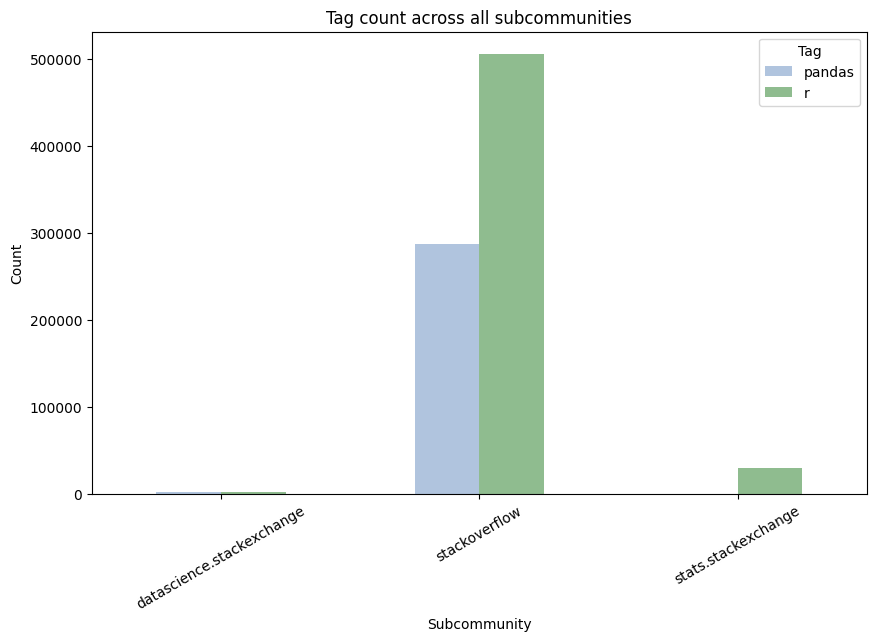

In [13]:
pivot_df.plot(kind="bar", figsize=(10, 6), color=["lightsteelblue", "darkseagreen"])
plt.title("Tag count across all subcommunities")
plt.xlabel("Subcommunity")
plt.ylabel("Count")
plt.xticks(rotation=30)
plt.show()

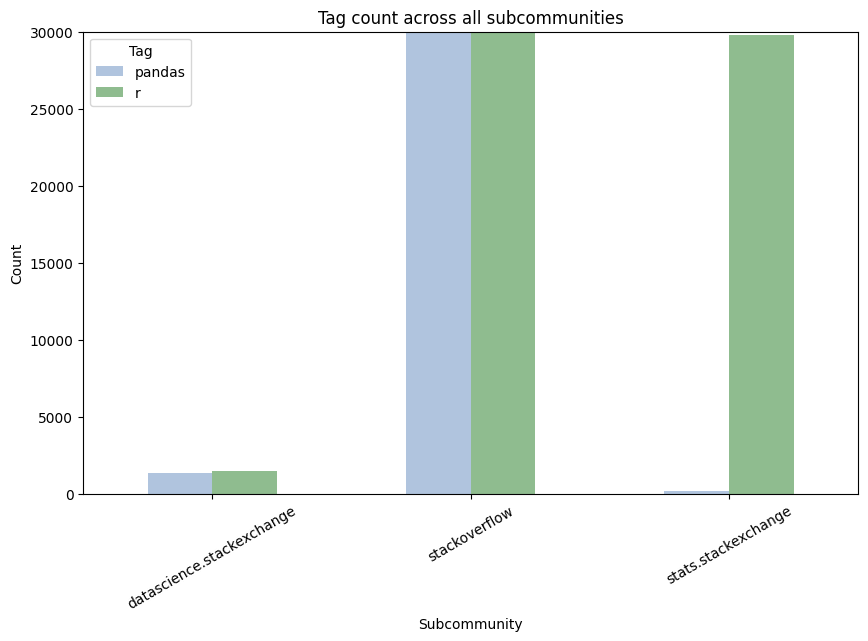

In [14]:
pivot_df.plot(kind="bar", figsize=(10, 6), color=["lightsteelblue", "darkseagreen"])
plt.title("Tag count across all subcommunities")
plt.xlabel("Subcommunity")
plt.ylabel("Count")
plt.xticks(rotation=30)
plt.ylim(0, 30000) 
plt.show()

### Findings
- As seen from the bar graph, R is the most popular language in the data science/statistics community. 
- From the reported proportions, in all communities, especially in the Cross Validated (stats.stackexchange) community, the proportion of R tags compared to Pandas tag is very high (99.43% of the tags were for R in stats.stackexchange compared to 0.57% of the Pandas tags). 

### Conclusion
- Based on our analysis of the Pandas and R tags across three different subcommunities (stackoverflow, stats.stackexchange, and datascience.stackexchange), R seems to be the most popular data science tool/language in the data science/statistics community. Even though further research is needed into the factors contributing to R's popularity, R is still heavily used across different industries because it's capable of performing complex and simple mathematical and statistical calculations, it is a free software, it's beginner-friendly, has a large ecosystem with tools for reporting and analyzing complex data models, and appropriately visualize the statistical data.